# Task 1 - Prediction using Supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

- Question : What will be predicted score if a student studies for 9.25 hrs/ day?

##### Author- Sagar P. Dhandare 
(Data Science and Business Analytics Intern)

## Percentage of an student based on the number of study hours.

In [1]:
# Importing required libraries :
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading dataset from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Cheaking NaN values :
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- There is no missing values in our dataset.
- Therefore there is no need of data cleaning.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

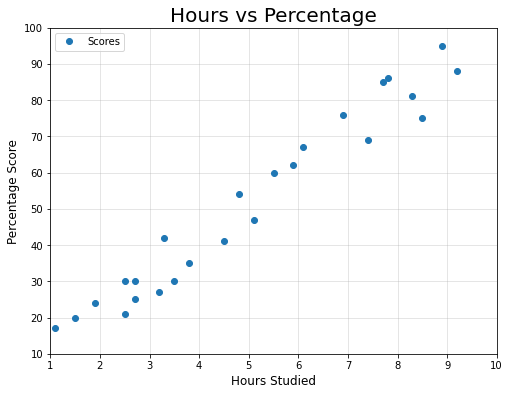

In [4]:
# Plotting the distribution of scores :

data.plot(x='Hours', y='Scores', style='o',figsize = (8,6)) 
plt.title('Hours vs Percentage', fontsize = 20)  
plt.xlabel('Hours Studied', fontsize = 12)  
plt.ylabel('Percentage Score', fontsize = 12) 
plt.grid(alpha = 0.4)
plt.axis([1,10,10,100])
plt.show()

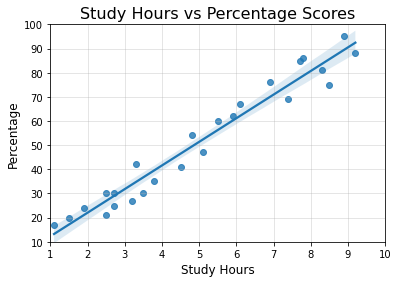

In [5]:
# plotting regressor plot to determine the relationship between feature and target :

sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.grid(alpha = 0.4)
plt.axis([1,10,10,100])
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
# train-test split :
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

- We have split our data into training and testing sets. 
- Now is finally the time to train our algorithm. 

### **Training the Algorithm**

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [9]:
print("Coefficient :", regressor.coef_)
print("Intercept :", regressor.intercept_)

Coefficient : [9.68207815]
Intercept : 2.826892353899737


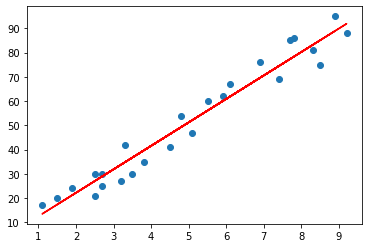

In [10]:
# Plotting the regression line :
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color = "red");
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
# Testing data - In Hours :
print(X_test) 

# Predicting the scores :
y_pred = regressor.predict(X_test) 

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted Values :
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [13]:
print("Training Score :", regressor.score(X_train, y_train))
print("Testing Score :", regressor.score(X_test, y_test))

Training Score : 0.9491209376364416
Testing Score : 0.9678055545167994


- What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
# Testing with some new data :

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("Predicted Score if a student studies for 9.25 hrs/ day is {}".format(own_pred[0]))

Predicted Score if a student studies for 9.25 hrs/ day is 92.38611528261494


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 Score :', metrics.r2_score(y_test, y_pred))

Mean Absolute Error : 3.9207511902099244
Mean Squared Error : 18.943211722315272
Root Mean Squared Error : 4.352380006653288
R-2 Score : 0.9678055545167994


#### Model Accuracy is 96.78%